In [979]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, \
AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report

import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cusory Inspection

Notes about Data: 

Administrative: 
- This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration:
- This is the amount of time spent in this category of pages.

Informational:
- This is the number of pages of this type (informational) that the user visited.

Informational_Duration: 
- This is the amount of time spent in this category of pages.

ProductRelated:
- This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration:
- This is the amount of time spent in this category of pages.

BounceRates:
- The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates:
- The percentage of pageviews on the website that end at that specific page.

PageValues:
- The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

SpecialDay:
- This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in

In [947]:
df = pd.read_csv('online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [948]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [951]:
df.info()

#Observation: 
#Month as a Object, Vistitor Type, 
#Weekend and Revenue as a Boolean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [952]:
df.corr()
#Observations:

#Revenues related to PageValues = 49%
#Revenues related to ProductRelated_Duration = 15%
#Revenues related to Informational = 9.5%
#Revenues related to 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


In [953]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

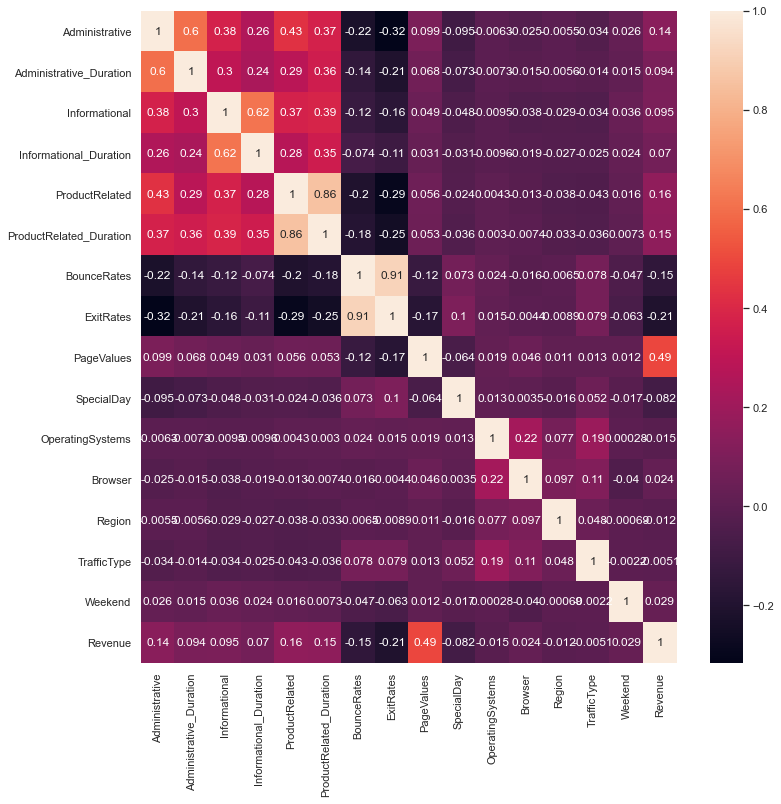

In [954]:
sns.set(rc={'figure.figsize': (12,12)})
sns.heatmap(df.corr(), annot=True);

In [955]:
df['Month'].value_counts(normalize=True)

May     0.272830
Nov     0.243147
Mar     0.154663
Dec     0.140065
Oct     0.044526
Sep     0.036334
Aug     0.035118
Jul     0.035036
June    0.023358
Feb     0.014923
Name: Month, dtype: float64

In [956]:
df['Weekend'].value_counts(normalize=True)
#Weekend and Revenue as a Boolean

False    0.767397
True     0.232603
Name: Weekend, dtype: float64

In [957]:
df['Revenue'].value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

In [958]:
df['Informational'].corr(df['Informational_Duration'])

0.6189548617814565

In [959]:
df['Informational'].corr(df['BounceRates'])

-0.11611361638719088

In [960]:
df['Informational'].corr(df['ExitRates'])

-0.16366606078450055

In [961]:
df['ProductRelated'].corr(df['ProductRelated_Duration'])

0.8609268361763701

In [962]:
df['ProductRelated'].corr(df['BounceRates'])

-0.20457763335075352

In [963]:
df['ProductRelated'].corr(df['ExitRates'])

-0.2925262831135806

# Pipeline Part 1: Cleaning

In [964]:
#df['Revenue'].corr(df['VisitorType'])
#Convert Revenue to Numeric
#Convert Vistor Type to Numeric

In [965]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
X = df.drop(['Revenue'], axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [984]:
def grab_numeric(df):
    return df.select_dtypes(include=['float', 'int'])

def drop_colum(df):
    return df.drop(['Administrative', 'Administrative_Duration'], axis=1, inplace=True)
# The FunctionTransformer will turn my function into a transformer.

def convert(df):
    return df.Revenue.replace({True: 1, False: 0})

In [ ]:
GrabNumeric = FunctionTransformer(grab_numeric)
DropAdmin= FunctionTransformer(drop_colum)
Convert = FunctionTransformer(convert)

In [ ]:
# Columns to feed to column transformer
num_cols = [ 'Informational', 'Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','OperatingSystems','Browser','Region','TrafficType']
cat_cols = ['VisitorType', 'Weekend', 'Month']

In [ ]:
pipe = Pipeline(steps=[('num', GrabNumeric),
                       ('ss', StandardScaler())])

In [ ]:
subpipe_num = Pipeline(steps=[('num_impute', SimpleImputer()),
                           ('ss', StandardScaler())])
subpipe_cat = Pipeline(steps=[('cat_impute', SimpleImputer(strategy='most_frequent')),
                             ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])




subpipe_drop = Pipeline(steps=[('admin', )])
subpipe_convert = Pipeline(steps=[('convert')])

In [836]:
# The "remainder='passthrough'" bit tells the compiler to leave
# the other df columns unchanged.

CT = ColumnTransformer(transformers=[('subpipe_num', subpipe_num, num_cols),
                                         ('subpipe_cat', subpipe_cat, cat_cols)],
                           remainder='passthrough')

In [972]:
pipe.fit(X_train)
pipe.transform(X_train)

array([[ 0.41200023,  1.5178332 , -0.16130117, ..., -0.78300436,
         3.84873775, -0.30499034],
       [-0.45773968, -0.24634426, -0.5906904 , ...,  0.15384657,
        -0.31565432, -0.30499034],
       [-0.45773968, -0.24634426, -0.55595431, ...,  0.15384657,
        -0.31565432, -0.30499034],
       ...,
       [-0.45773968, -0.24634426, -0.52089599, ...,  0.50181978,
        -0.31565432, -0.30499034],
       [-0.45773968, -0.24634426, -0.46109062, ..., -0.54209983,
        -0.31565432, -0.30499034],
       [ 0.32248479, -0.24634426, -0.49856694, ..., -0.29048844,
        -0.31565432, -0.30499034]])

In [978]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# Pipeline Part 2: Cross Validate Function

In [986]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        self.pred_y = X_test
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''Classification Report Results for `{self.name}` model:
            
        ''')
        print(classification_report(y_test, {self.model}.predict{self.X}))
        print(classification_Report(y_test, {self.model}.predict{self.pred_y}))
        #Question
        #Classification report

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax
    
    

SyntaxError: invalid syntax (<ipython-input-986-f3406f3ed23a>, line 47)

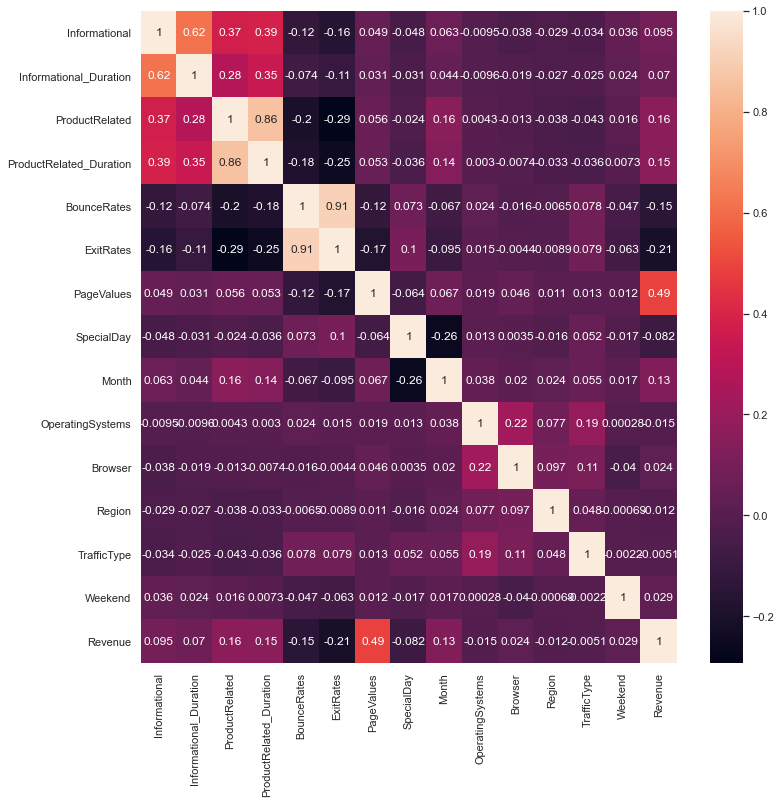

In [842]:
sns.set(rc={'figure.figsize': (12,12)})
sns.heatmap(df.corr(), annot=True);



# Model 1: Logistical Regression

In [900]:
logreg_model_pipe = Pipeline(steps=[('ct', CT),
                            ('logreg', LogisticRegression(random_state=42))])


In [901]:
logreg_model_pipe.fit(X_train, y_train)

C:\Users\Luke Sims\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues', 'SpecialDay',
                                                   'OperatingSystems',
    

In [902]:
logreg_model_pipe.score(X_train, y_train)

0.8846112252622472

In [903]:
log_pipe = ModelWithCV(logreg_model_pipe, model_name='log_pipe', X=X_train, y=y_train)

C:\Users\Luke Sims\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Luke Sims\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [904]:
log_pipe.print_cv_summary()

CV Results for `log_pipe` model:
            0.88450 ± 0.00920 accuracy
        


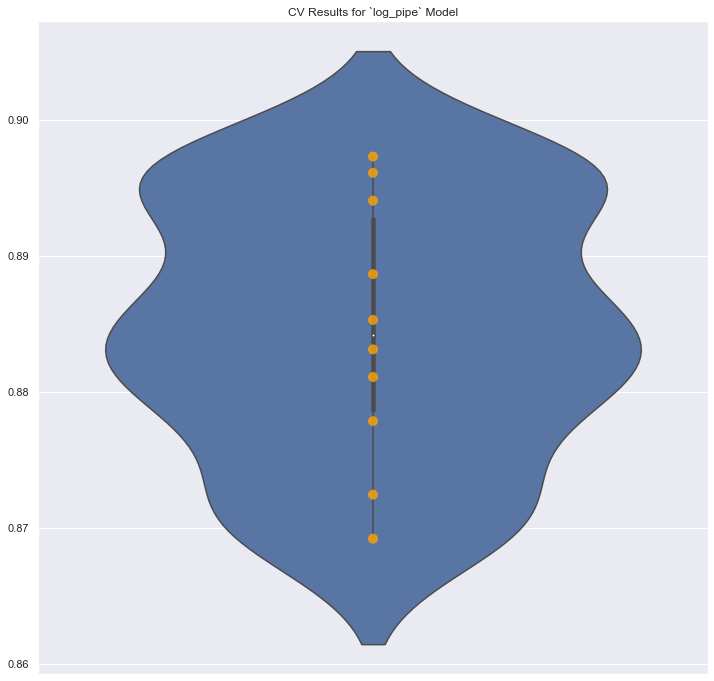

In [848]:
fig, ax = plt.subplots()

log_pipe.plot_cv(ax=ax);

# Logistic: Confusion Matrix / Classification Report

In [981]:
#Training Data - Only look at testing at final model 
plot_confusion_matrix(logreg_model_pipe, X_test, y_test);



ValueError: Column ordering must be equal for fit and for transform when using the remainder keyword

In [982]:
print(classification_report(y_test, logreg_model_pipe.predict(X_test)))

ValueError: Column ordering must be equal for fit and for transform when using the remainder keyword

# Model 2: KNN

In [909]:
knn_model_pipe = Pipeline([('ct', CT),
                           ('knn_model', KNeighborsClassifier())])

In [910]:
knn_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues', 'SpecialDay',
                                                   'OperatingSystems',
    

In [911]:
knn_model_pipe.score(X_train, y_train)

0.9037525684005624

In [912]:
knn_model = ModelWithCV(model=knn_model_pipe,
                          model_name='knn model',
                          X=X_train,
                          y=y_train)

In [913]:
knn_model_pipe.print_cv_summary()

AttributeError: 'Pipeline' object has no attribute 'print_cv_summary'

In [ ]:
fig, ax = plt.subplots()

knn_model_pipe.plot_cv(ax=ax);

# KNN: Confusion Matrix / Classification Report

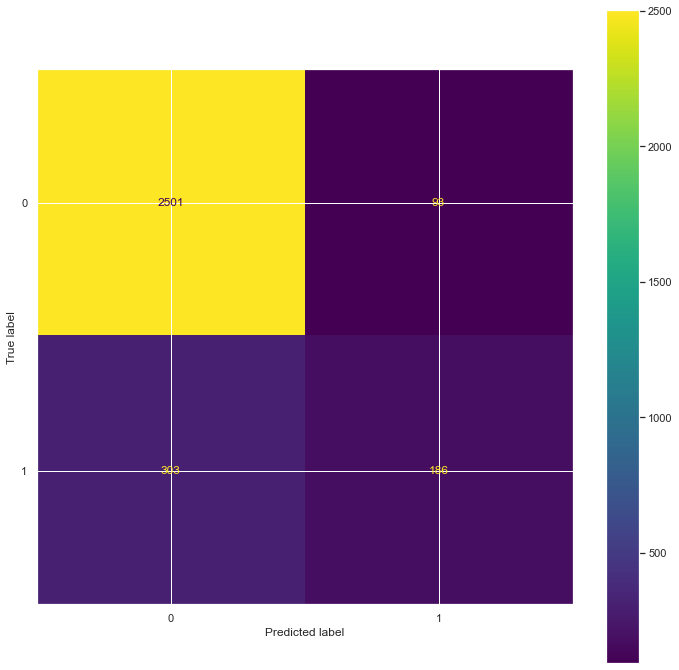

In [914]:
plot_confusion_matrix(knn_model_pipe, X_test, y_test);

In [915]:
print(classification_report(y_test, knn_model_pipe.predict(X_test)))

NameError: name 'classification_report' is not defined

# Model 3: Decision Tree

In [917]:
dt_model_pipe = Pipeline([('ct', CT), 
                          ('dt_model', DecisionTreeClassifier(random_state=42))])

In [918]:
dt_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues', 'SpecialDay',
                                                   'OperatingSystems',
    

In [919]:
dt_model_pipe.score(X_train, y_train)

1.0

In [920]:
dt_model_pipe = ModelWithCV(model=dt_model_pipe,
                          model_name='dt model',
                          X=X_train,
                          y=y_train)

In [921]:
dt_model_pipe.print_cv_summary()

CV Results for `dt model` model:
            0.85466 ± 0.01085 accuracy
        


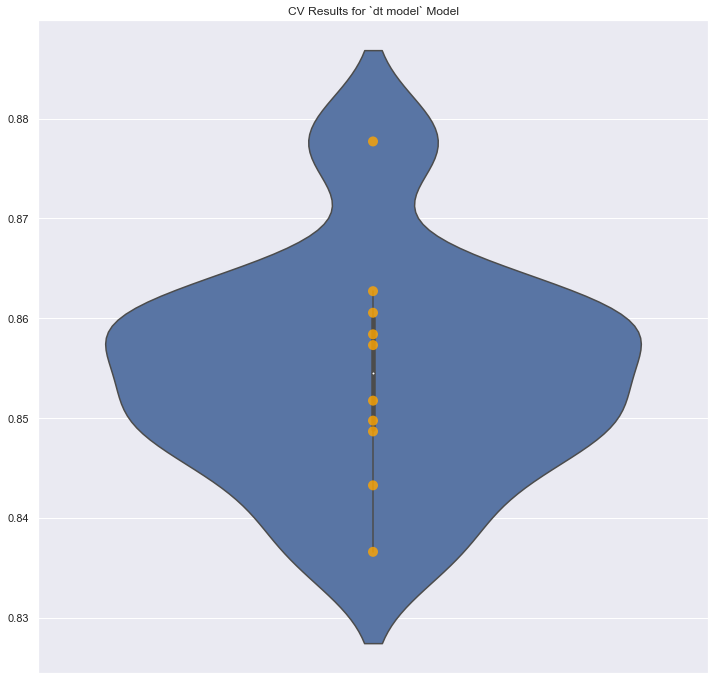

In [922]:
fig, ax = plt.subplots()

dt_model_pipe.plot_cv(ax=ax);

# Decision Tree: Confusion Matrix and Classification Report

In [923]:
plot_confusion_matrix(dt_model_pipe, X_test, y_test);



ValueError: plot_confusion_matrix only supports classifiers

In [896]:
print(classification_report(y_test, dt_model_pipe.predict(X_test)))

NameError: name 'classification_report' is not defined

# Model 4: Random Forest

In [791]:
rfc_model_pipe = Pipeline(steps=[('ct', CT),
                            ('rfc', RandomForestClassifier(random_state=42))])

In [792]:
rfc_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues', 'SpecialDay',
                                                   'OperatingSystems',
    

In [793]:
rfc_model_pipe.score(X_train, y_train)
#OVERFIT

1.0

In [794]:
forest_pipe = ModelWithCV(model=rfc_model_pipe,
                          model_name='forest_pipe',
                          X=X_train,
                          y=y_train)

In [796]:
forest_pipe.print_cv_summary()

CV Results for `forest_pipe` model:
            0.90364 ± 0.00972 accuracy
        


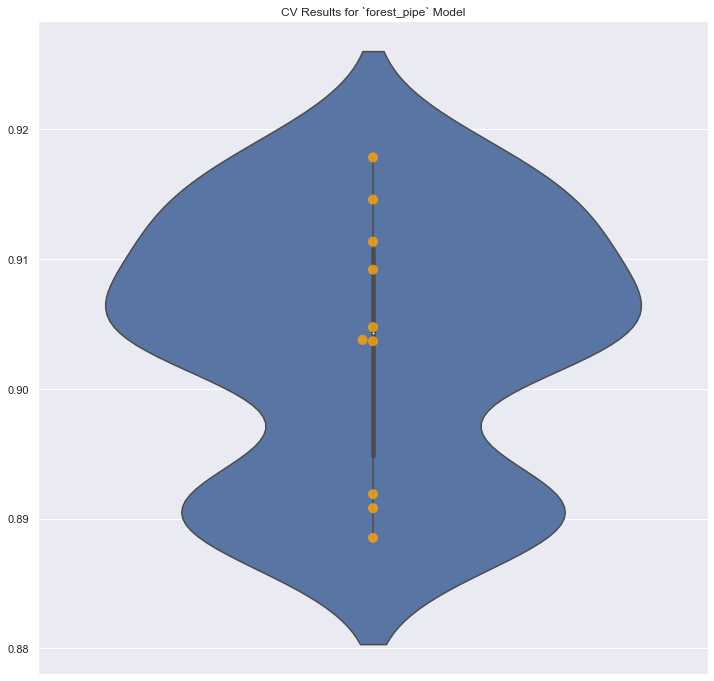

In [797]:
fig, ax = plt.subplots()

forest_pipe.plot_cv(ax=ax);

# Random Forest: Confusion Matrix / Classification Report

In [924]:
plot_confusion_matrix(forest_pipe, X_test, y_test);

rfc_model_pipe

ValueError: plot_confusion_matrix only supports classifiers

In [ ]:
print(classification_report(y_test, forest_pipe.predict(X_test)))

# Gradient Boosting Classifer 

In [688]:
gbc_model_pipe = Pipeline([('ct', CT), 
                           ('gbc', GradientBoostingClassifier(random_state=42))])

In [689]:
gbc_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues', 'SpecialDay',
                                                   'OperatingSystems',
    

In [690]:
gbc_model_pipe.score(X_train, y_train)

0.9170541797339677

In [691]:
boost_pipe = ModelWithCV(model=gbc_model_pipe,
                         model_name='boost_pipe',
                         X=X_train,
                         y=y_train)

In [798]:
boost_pipe.print_cv_summary()

CV Results for `boost_pipe` model:
            0.90300 ± 0.00995 accuracy
        


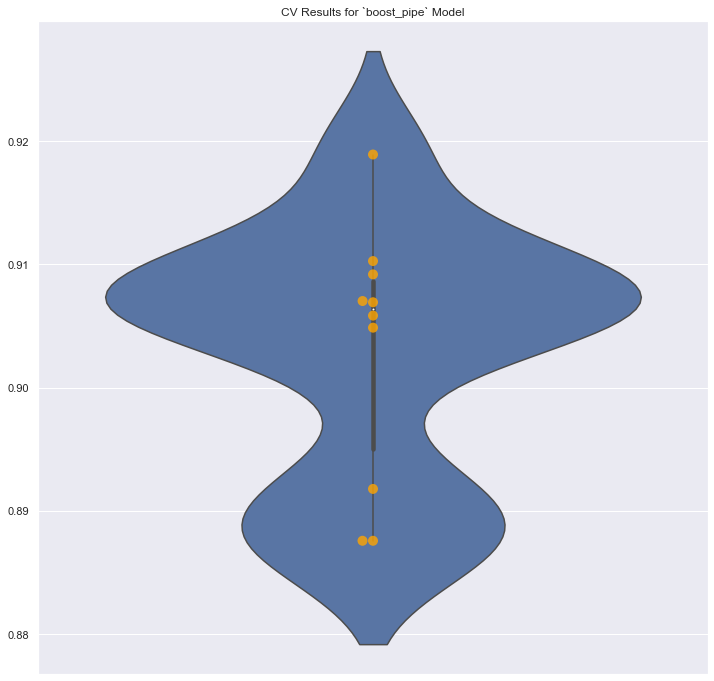

In [692]:
fig, ax = plt.subplots()

boost_pipe.plot_cv(ax=ax);

# Gradient Boost: Confusion Matrix - Classification Report

In [672]:
plot_confusion_matrix(boost_pipe, X_test, y_test);

gbc_model_pipe

NameError: name 'final_model' is not defined

In [ ]:
print(classification_report(y_test, boost_pipe.predict(X_test)))

# AdaBoost

In [799]:
abc = Pipeline([('ct', CT), ('gbc', AdaBoostClassifier(random_state=42))])

In [805]:
abc.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues', 'SpecialDay',
                                                   'OperatingSystems',
    

In [925]:
abc.score(X_train, y_train)

0.8940196820590461

AttributeError: 'Pipeline' object has no attribute 'plot_cv'

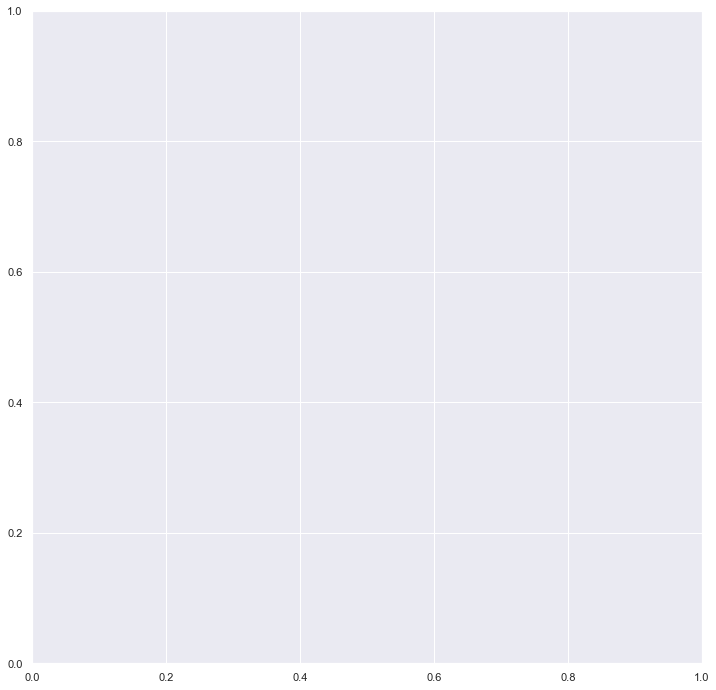

In [926]:
fig, ax = plt.subplots()

abc.plot_cv(ax=ax);

# Gradient Boost: Confusion Matrix - Classification Report

In [876]:
#Question - AUC / ROC True Positve Rate / Across Different Threshold


precision_score(y_test, abc.predict(X_test))

0.6511056511056511

In [878]:
recall_score(y_test, abc.predict(X_test))

0.5419222903885481

In [985]:
print(classification_report(y_test, boost_pipe.predict(X_test)))

AttributeError: 'ModelWithCV' object has no attribute 'predict'

In [ ]:
confusion_matrix(y_test2, grad_boost_class.predict(x_test2))
print(classification_report(y_test, final_model3.predict(X_test)))

In [ ]:
cross_val_score(abr, galaxies_x_train, galaxies_y_train, cv=5)

# Model 6: Gradient Boosting

In [929]:
gbc = Pipeline([('ct', CT), ('gbc', GradientBoostingClassifier(random_state=42))])


gbc.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues', 'SpecialDay',
                                                   'OperatingSystems',
    

In [930]:
gbc.score(X_test, y_test)

0.899772948426857

In [931]:
confusion_matrix(y_test, grad_boost_class.predict(X_test))

NameError: name 'confusion_matrix' is not defined

In [932]:
print(classification_report(y_test, grad_boost_class.predict(X_test))

SyntaxError: unexpected EOF while parsing (<ipython-input-932-e6f3c12c30c9>, line 1)

# Final Model: XGBoost 

In [934]:
#Question

grad_boost_class = Pipeline([('ct', CT), ('gbc', xgboost.XGBClassifier(random_state=42, objective='binary:logistic'))])

grad_boost_class.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues', 'SpecialDay',
                                                   'OperatingSystems',
    

In [936]:
cross_val_score(grad_boost_class, X_train, y_train, cv=5)

array([0.88702703, 0.89621622, 0.90265008, 0.88588426, 0.89453759])

In [937]:
grad_boost_class.score(X_test, y_test)

0.8919883230619526

In [938]:
confusion_matrix(y_test, grad_boost_class.predict(X_test))

NameError: name 'confusion_matrix' is not defined

In [ ]:
print(classification_report(y_test, grad_boost_class.predict(X_test)))

# XGBoost: Confusion Matrix and Classification Report

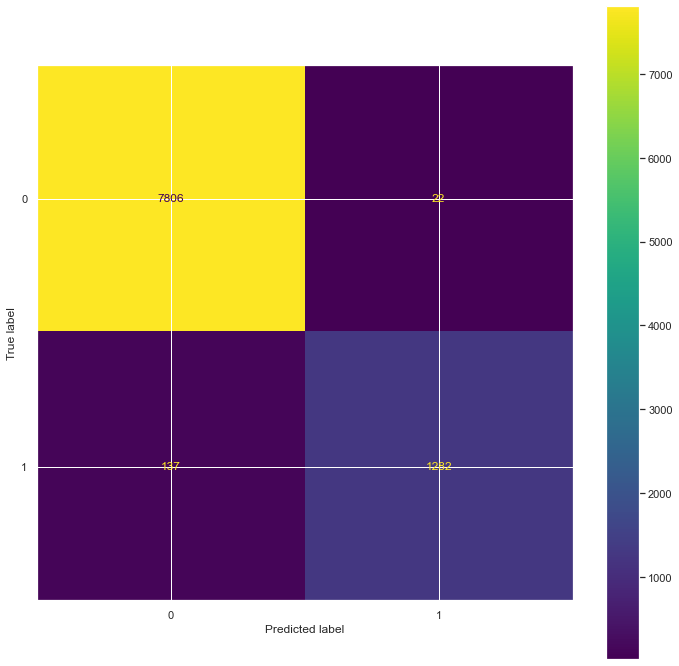

In [940]:
#up to here


plot_confusion_matrix(grad_boost_class, X_train, y_train);

In [ ]:
print(classification_report(y_test, grad_boost_class.predict(X_test)))

In [694]:
params = {}
params['rfc__criterion'] = ['gini', 'entropy']
params['rfc__min_samples_leaf'] = [1, 5, 10]
params['rfc__max_depth'] = [5, 10, 15]
params

{'rfc__criterion': ['gini', 'entropy'],
 'rfc__min_samples_leaf': [1, 5, 10],
 'rfc__max_depth': [5, 10, 15]}

In [695]:
gs = GridSearchCV(estimator=rfc_model_pipe,
                 param_grid=params,
                 cv=10, verbose=3, n_jobs=-3)

In [696]:
gs.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-3)]: Done  24 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-3)]: Done 120 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-3)]: Done 180 out of 180 | elapsed:   42.2s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('num_impute',
                                                                                          SimpleImputer()),
                                                                                         ('ss',
                                                                                          StandardScaler())]),
                                                                         ['Informational',
                                                                          'Informational_Duration',
                                                                          'ProductRelated',
                                                             

In [697]:
gs.best_params_

{'rfc__criterion': 'gini', 'rfc__max_depth': 10, 'rfc__min_samples_leaf': 1}

In [698]:
gs.best_score_

0.9055897975897975

In [699]:
gs_pipe = ModelWithCV(logreg_model_pipe, model_name='log_pipe', X=X_train, y=y_train)
log_pipe.print_cv_summary()

C:\Users\Luke Sims\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Luke Sims\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

CV Results for `log_pipe` model:
            0.88450 ± 0.00920 accuracy
        


C:\Users\Luke Sims\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Luke Sims\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

# Hyperparameter Tuning

In [701]:
gs = GridSearchCV(estimator=abr,
                 param_grid={
                     'n_estimators': [25, 50, 100],
                     'loss': ['linear', 'square']
                 }, cv=5, verbose=3, n_jobs=-3)

NameError: name 'abr' is not defined

In [702]:
gs.fit(galaxies_x_train, galaxies_y_train)

NameError: name 'galaxies_x_train' is not defined

In [703]:
gs.best_params_

{'rfc__criterion': 'gini', 'rfc__max_depth': 10, 'rfc__min_samples_leaf': 1}

In [704]:
gs.best_score_

0.9055897975897975

In [705]:
gs2 = GridSearchCV(estimator=abr,
                 param_grid={
                     'n_estimators': [20, 25, 30],
                     'loss': ['linear', 'square']
                 }, cv=5, verbose=3)


gs2.fit(galaxies_x_train, galaxies_y_train)


gs2.best_params_

NameError: name 'abr' is not defined

In [ ]:
gs3 = GridSearchCV(estimator=abr,
                 param_grid={
                     'n_estimators': [20, 25, 30],
                     'loss': ['linear', 'square']
                 }, cv=5, verbose=3)

gs3.fit(galaxies_x_train, galaxies_y_train)
gs3.best_params_

gs3.best_score_

In [541]:
#Pipeline String 
#Cross Validation Tests for each model
#Hyper Parameter Tunings


#Logistic 
#AUC / ROC 
#Confusion Matrix 
#KNN 
#Decision Tree 
#Random Forest
#XG Boost


#Notes
#Brief
#Obserations.


#Pipeline + Model Type + CV + Confusion Matrix

In [ ]:
galaxies_x_rev = galaxies_x.values.reshape(-1, 1)

galaxies_x_train, galaxies_x_test, galaxies_y_train, galaxies_y_test =\
train_test_split(galaxies_x_rev, galaxies_y, random_state=42)


abr = AdaBoostRegressor(random_state=42)

abr.fit(galaxies_x_train, galaxies_y_train)
abr.score(galaxies_x_train, galaxies_y_train)

cross_val_score(abr, galaxies_x_train, galaxies_y_train, cv=5)



gs = GridSearchCV(estimator=abr,
                 param_grid={
                     'n_estimators': [25, 50, 100],
                     'loss': ['linear', 'square']
                 }, cv=5, verbose=3, n_jobs=-3)

gs.fit(galaxies_x_train, galaxies_y_train)
gs.best_params_
gs.best_score_

gs2 = GridSearchCV(estimator=abr,
                 param_grid={
                     'n_estimators': [20, 25, 30],
                     'loss': ['linear', 'square']
                 }, cv=5, verbose=3)


gs2.fit(galaxies_x_train, galaxies_y_train)
gs2.best_params_



gs3 = GridSearchCV(estimator=abr,
                 param_grid={
                     'n_estimators': [20, 25, 30],
                     'loss': ['linear', 'square']
                 }, cv=5, verbose=3)

gs3.fit(galaxies_x_train, galaxies_y_train)
gs3.best_params_

gs3.best_score_